In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

In [2]:
df = pd.read_excel("datasets/Forbes Athlete List 2012-2019.xlsx")
df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,$127 M,$92 M,$35 M,Soccer,2019
1,#2,Cristiano Ronaldo,$109 M,$65 M,$44 M,Soccer,2019
2,#3,Neymar,$105 M,$75 M,$30 M,Soccer,2019
3,#4,Canelo Alvarez,$94 M,$92 M,$2 M,Boxing,2019
4,#5,Roger Federer,$93.4 M,$7.4 M,$86 M,Tennis,2019


In [3]:
df.Rank = df.Rank.apply(lambda x: int(x.split("#")[1]) if type(x) == np.str else x)
df.Pay = df.Pay.apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df.Endorsements = df.Endorsements.apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df["Salary/Winnings"].replace("-", "$nan M", inplace=True)
df["Salary/Winnings"] = df["Salary/Winnings"].apply(lambda x: float(x.split(" ")[0].split("$")[1]))
df.Sport.replace({"Mixed Martial Arts": "MMA",
                  "Auto racing": "Racing",
                  "Auto Racing": "Racing",
                  "Basketbal": "Basketball"}, inplace=True)

df.columns=["Rank", "Name", "Pay", "Salary_Winnings", "Endorsements", "Sport", "Year"]
df.head()

,Rank,Name,Pay,Salary_Winnings,Endorsements,Sport,Year
0,1,Lionel Messi,127.0,92.0,35.0,Soccer,2019
1,2,Cristiano Ronaldo,109.0,65.0,44.0,Soccer,2019
2,3,Neymar,105.0,75.0,30.0,Soccer,2019
3,4,Canelo Alvarez,94.0,92.0,2.0,Boxing,2019
4,5,Roger Federer,93.4,7.4,86.0,Tennis,2019


In [4]:
df.isnull().any()

Rank               False
Name               False
Pay                False
Salary_Winnings     True
Endorsements       False
Sport              False
Year               False
dtype: bool

In [5]:
df[df["Salary_Winnings"].isnull()]

,Rank,Name,Pay,Salary_Winnings,Endorsements,Sport,Year
520,79,Russell Westbrook,0.0,NaN,0.0,Basketball,2015


In [6]:
df.drop(520, inplace=True)

In [7]:
df.isnull().any()

Rank               False
Name               False
Pay                False
Salary_Winnings    False
Endorsements       False
Sport              False
Year               False
dtype: bool

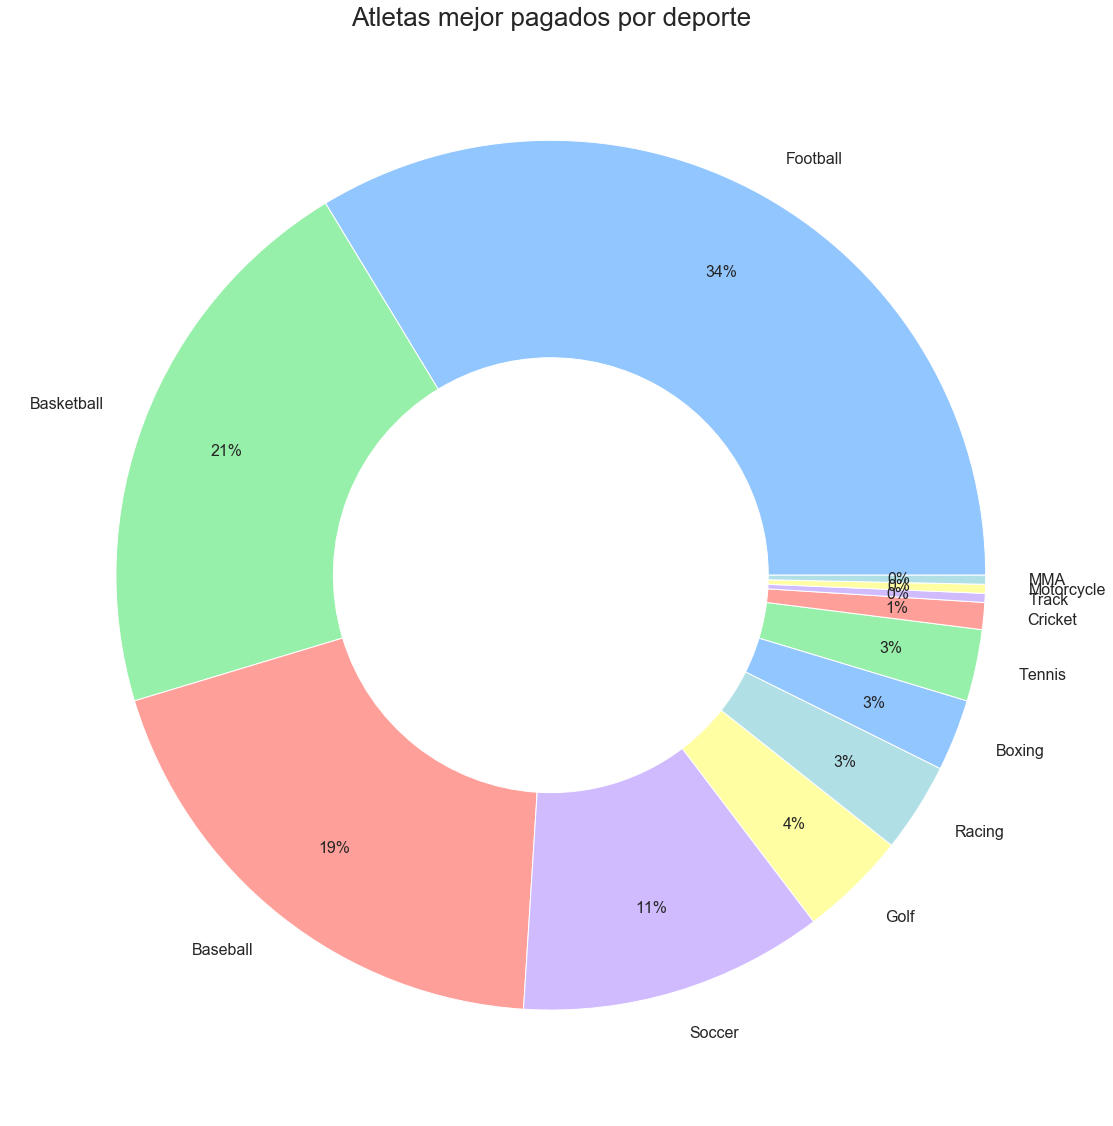

In [8]:
df.groupby("Name")["Sport"].first().value_counts().plot(kind="pie", autopct="%.0f%%", figsize=(20,20), fontsize=16, wedgeprops=dict(width=0.5), pctdistance=0.8)
plt.ylabel(None)
plt.title("Atletas mejor pagados por deporte", fontsize=26)
plt.show()

In [9]:
df = df[(df["Sport"] != "MMA") & (df["Sport"] != "Track") & (df["Sport"] != "Motorcycle")]

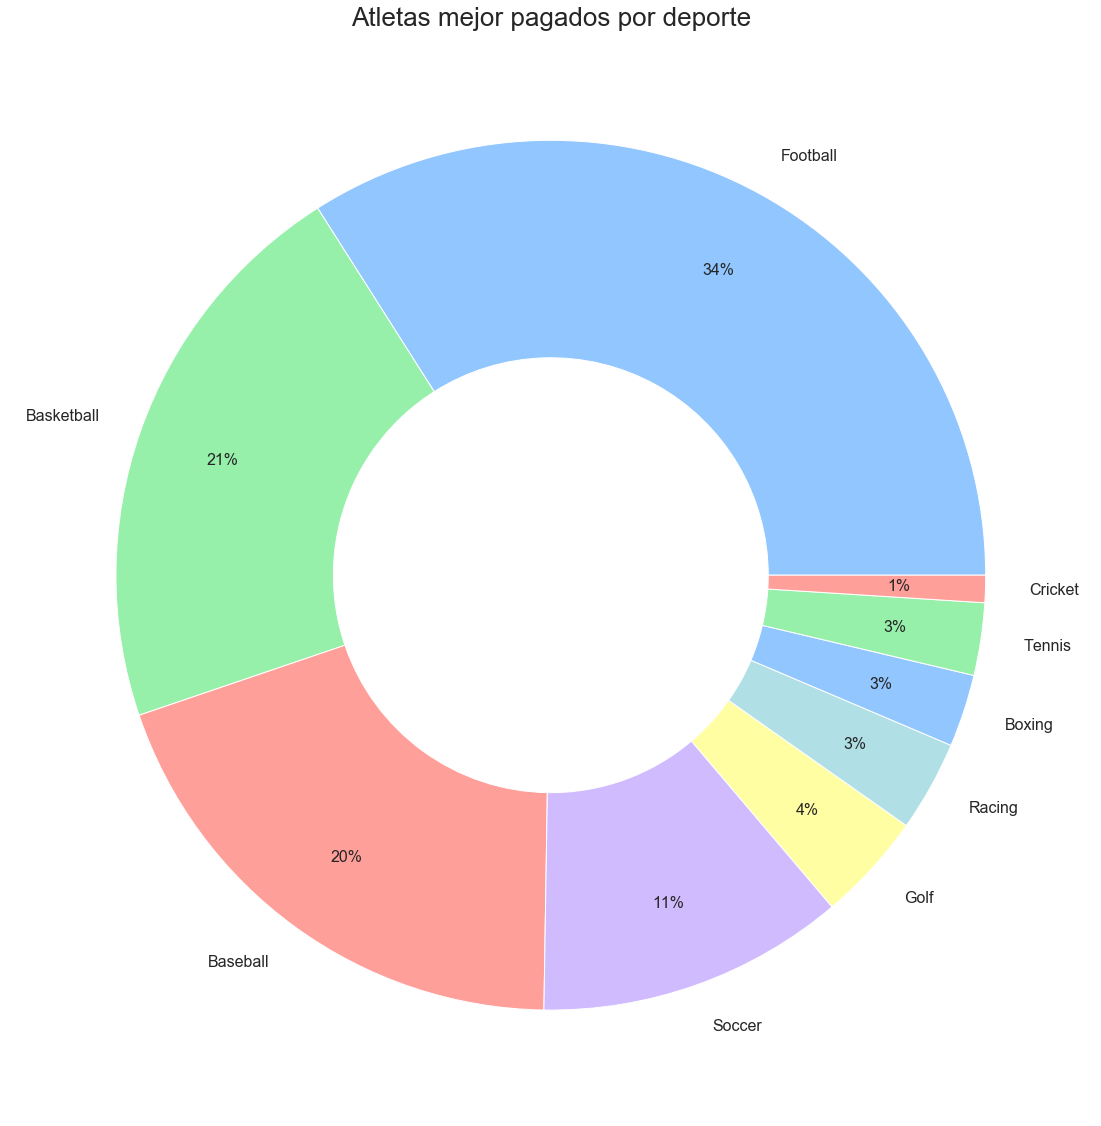

In [10]:
df.groupby("Name")["Sport"].first().value_counts().plot(kind="pie", autopct="%.0f%%", figsize=(20,20), fontsize=16, wedgeprops=dict(width=0.5), pctdistance=0.8)
plt.ylabel(None)
plt.title("Atletas mejor pagados por deporte", fontsize=26)
plt.show()

In [11]:
df.Year = pd.to_datetime(df.Year, format="%Y")

In [12]:
racing_bar_data = df.pivot_table(values="Pay", index="Year", columns="Name")
racing_bar_data

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,21.5,NaN,17.4,33.0,...,NaN,NaN,24.3,28.0,19.1,NaN,NaN,NaN,NaN,NaN
2013-01-01,16.6,NaN,NaN,49.0,NaN,21.2,NaN,NaN,NaN,30.3,...,NaN,NaN,21.1,24.0,20.7,NaN,17.0,NaN,21.7,19.7
2014-01-01,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.4,28.0,21.7,NaN,18.8,NaN,NaN,40.4
2015-01-01,NaN,NaN,NaN,19.1,19.8,21.5,NaN,NaN,25.9,NaN,...,NaN,NaN,26.9,21.5,20.0,NaN,NaN,23.7,NaN,39.1
2016-01-01,NaN,33.3,NaN,NaN,NaN,21.4,NaN,NaN,26.3,21.1,...,NaN,NaN,26.1,NaN,NaN,23.8,NaN,24.7,NaN,37.4
2017-01-01,NaN,NaN,NaN,NaN,NaN,21.7,NaN,28.1,27.3,NaN,...,22.0,28.1,23.6,21.5,NaN,NaN,NaN,24.1,NaN,32.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8,30.3,NaN,...,24.0,35.1,27.0,NaN,NaN,25.2,NaN,24.2,NaN,NaN
2019-01-01,NaN,NaN,41.4,89.3,NaN,NaN,NaN,32.0,28.0,NaN,...,25.0,NaN,NaN,NaN,NaN,29.4,NaN,NaN,NaN,NaN


In [13]:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index(['Carmelo Anthony', 'Cristiano Ronaldo', 'Dwight Howard',
       'Justin Verlander', 'LeBron James', 'Lionel Messi', 'Phil Mickelson',
       'Rafael Nadal', 'Roger Federer', 'Tiger Woods'],
      dtype='object', name='Name')

In [14]:
racing_bar_completa = racing_bar_data.interpolate(method="linear").fillna(method="bfill")
#racing_bar_completa = racing_bar_completa.cumsum()
racing_bar_completa

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,16.6,33.3,41.4,49.00,19.8,21.20,21.5,28.1,17.400000,33.000000,...,22.0,28.1,24.3,28.0,19.1,23.8,17.0,23.7,21.7,19.7
2013-01-01,16.6,33.3,41.4,49.00,19.8,21.20,21.5,28.1,20.233333,30.300000,...,22.0,28.1,21.1,24.0,20.7,23.8,17.0,23.7,21.7,19.7
2014-01-01,16.6,33.3,41.4,22.00,19.8,21.35,21.5,28.1,23.066667,27.233333,...,22.0,28.1,23.4,28.0,21.7,23.8,18.8,23.7,21.7,40.4
2015-01-01,16.6,33.3,41.4,19.10,19.8,21.50,21.5,28.1,25.900000,24.166667,...,22.0,28.1,26.9,21.5,20.0,23.8,18.8,23.7,21.7,39.1
2016-01-01,16.6,33.3,41.4,36.65,19.8,21.40,21.5,28.1,26.300000,21.100000,...,22.0,28.1,26.1,21.5,20.0,23.8,18.8,24.7,21.7,37.4
2017-01-01,16.6,33.3,41.4,54.20,19.8,21.70,21.5,28.1,27.300000,21.100000,...,22.0,28.1,23.6,21.5,20.0,24.5,18.8,24.1,21.7,32.0
2018-01-01,16.6,33.3,41.4,71.75,19.8,21.70,21.5,29.8,30.300000,21.100000,...,24.0,35.1,27.0,21.5,20.0,25.2,18.8,24.2,21.7,32.0
2019-01-01,16.6,33.3,41.4,89.30,19.8,21.70,21.5,32.0,28.000000,21.100000,...,25.0,35.1,27.0,21.5,20.0,29.4,18.8,24.2,21.7,32.0


In [15]:
racing_bar_completa = racing_bar_completa.resample("1D").interpolate(method="linear")[::7]
racing_bar_completa

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,16.6,33.3,41.4,49.000000,19.8,21.2,21.5,28.100000,17.400000,33.000000,...,22.000000,28.1,24.300000,28.000000,19.100000,23.800000,17.0,23.7,21.7,19.7
2012-01-08,16.6,33.3,41.4,49.000000,19.8,21.2,21.5,28.100000,17.454189,32.948361,...,22.000000,28.1,24.238798,27.923497,19.130601,23.800000,17.0,23.7,21.7,19.7
2012-01-15,16.6,33.3,41.4,49.000000,19.8,21.2,21.5,28.100000,17.508379,32.896721,...,22.000000,28.1,24.177596,27.846995,19.161202,23.800000,17.0,23.7,21.7,19.7
2012-01-22,16.6,33.3,41.4,49.000000,19.8,21.2,21.5,28.100000,17.562568,32.845082,...,22.000000,28.1,24.116393,27.770492,19.191803,23.800000,17.0,23.7,21.7,19.7
2012-01-29,16.6,33.3,41.4,49.000000,19.8,21.2,21.5,28.100000,17.616758,32.793443,...,22.000000,28.1,24.055191,27.693989,19.222404,23.800000,17.0,23.7,21.7,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-02,16.6,33.3,41.4,87.857534,19.8,21.7,21.5,31.819178,28.189041,21.100000,...,24.917808,35.1,27.000000,21.500000,20.000000,29.054795,18.8,24.2,21.7,32.0
2018-12-09,16.6,33.3,41.4,88.194110,19.8,21.7,21.5,31.861370,28.144932,21.100000,...,24.936986,35.1,27.000000,21.500000,20.000000,29.135342,18.8,24.2,21.7,32.0
2018-12-16,16.6,33.3,41.4,88.530685,19.8,21.7,21.5,31.903562,28.100822,21.100000,...,24.956164,35.1,27.000000,21.500000,20.000000,29.215890,18.8,24.2,21.7,32.0


In [32]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

selected  = racing_bar_completa.iloc[-1,:].sort_values(ascending=False)[:20].index
data = racing_bar_completa[selected].round()

fig,ax = plt.subplots(figsize=(9.3,7))
fig.subplots_adjust(left=0.18)
no_of_frames = data.shape[0] #Number of frames

#initiate the barplot with the first rows of the dataframe
bars = sns.barplot(y=data.columns,x=data.iloc[0,:],orient="h",ax=ax)
ax.set_xlim(0,1500)
txts = [ax.text(0,i,0,va="center") for i in range(data.shape[1])]
title_txt = ax.text(650,-1,"Date: ",fontsize=12)
ax.set_xlabel("Pay (Millions USD)")
ax.set_ylabel(None)

def animate(i):
#     print(f"i={i}/{no_of_frames}")
    #get i'th row of data 
    y = data.iloc[i,:]
    
    #update title of the barplot axis
    title_txt.set_text(f"Date: {str(data.index[i].date())}")
    
    #update elements in both plots
    for j, b, in enumerate(bars.patches):
        #update each bar's height
        b.set_width(y[j])
        
        #update text for each bar (optional)
        txts[j].set_text(f"${y[j].astype(int)}M")
        txts[j].set_x(y[j])

anim=FuncAnimation(fig,animate,repeat=False,frames=no_of_frames,interval=1,blit=False)
anim.save('athletes.gif', writer='imagemagick', fps=120)
plt.close(fig)

In [19]:
FFMpegWriter??